In [2]:
# this script is to evaluate all of the villar x roadmap x species sequence alignments without having to run the entire method2_v1,2,3 scripts

import os, sys
import pandas
import glob
import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
plt.style.use('seaborn-deep')
today = datetime.date.today()

In [3]:
roadmap_path = "/dors/capra_lab/users/fongsl/roadmap/stringent/"
result_path = "%sresults/" %roadmap_path
os.chdir(result_path)

In [4]:
# This dataframe is called "short_vrs" in the method2_v3.py script

vrs = pandas.read_csv("%svillar_x_roadmap_x_species_overlap.csv"%result_path, sep = '\t')
vrs["length"] = vrs["v-end"]-vrs["v-start"]
#get quantiles of enh tissue overlap in roadmap
q25= int(vrs["sum"].quantile(0.25))
q50 = int(vrs["sum"].quantile(0.50))
q75 = int(vrs["sum"].quantile(0.75))
q90 = int(vrs["sum"].quantile(0.90))

In [5]:
vrs.head()

,v-chr,v-start,v-end,IDs,E120,E127,E101,E034,E104,E014,...,Shar,Mmul,Mfur,aln_inact,hq_aln_inact,act_sp,hq_act_sp,aln_sp,hq_aln_sp,length
0,chr20,270226,272388,hsaH3K27Ac23366,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,-,NaN,7,6,2,1,9,7,2162
1,chr20,289482,291606,hsaH3K27Ac23368,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1,-,9,4,3,2,12,6,2124
2,chr20,342933,346519,hsaH3K27Ac23371,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,-,NaN,6,5,4,2,10,7,3586
3,chr20,346432,347763,hsaH3K27Ac23372,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,-,NaN,7,6,1,1,8,7,1331
4,chr20,350157,354996,hsaH3K27Ac23373,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1,NaN,1,1,7,6,8,7,4839


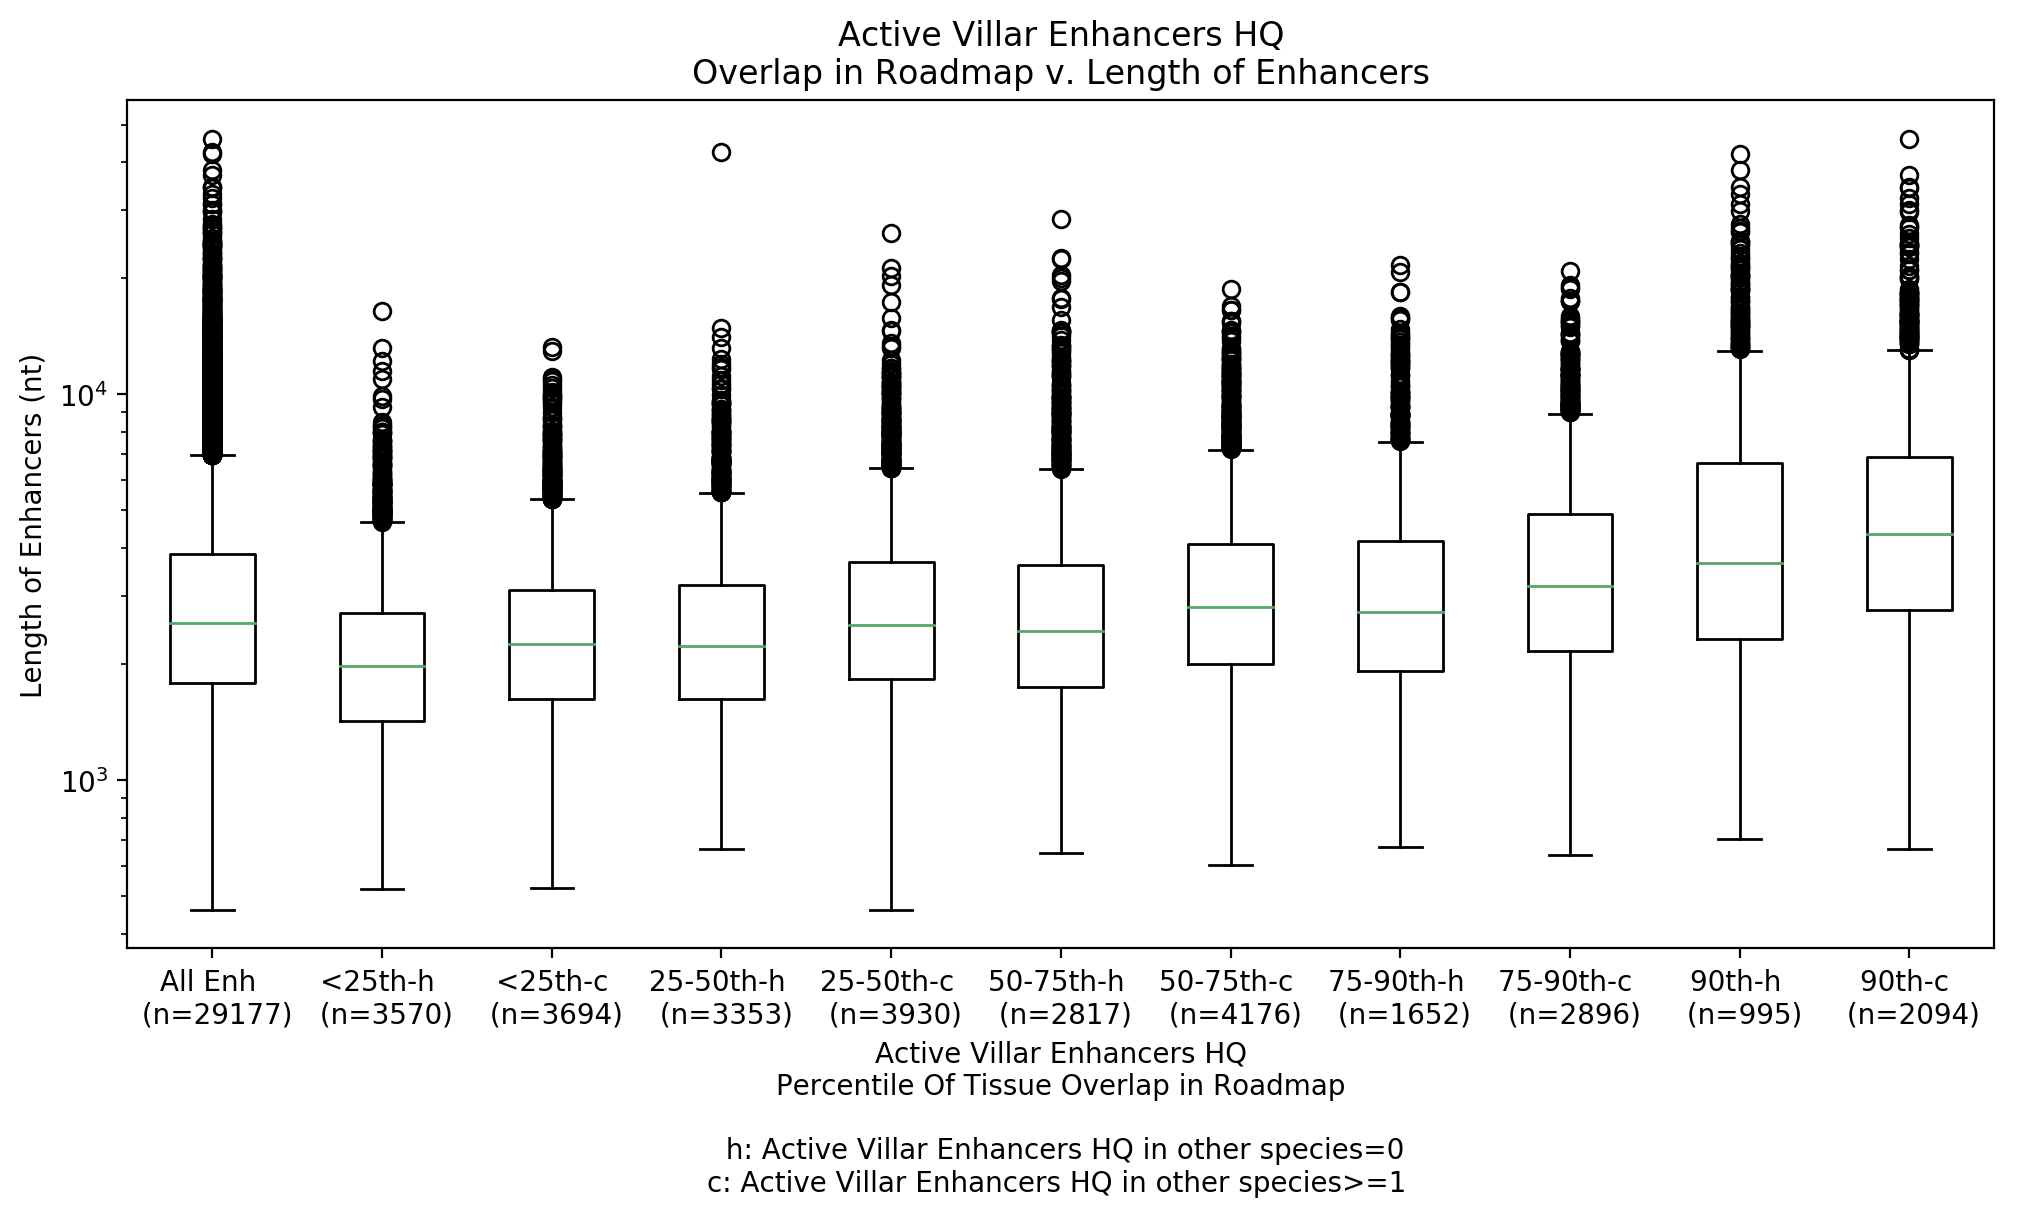

hq_act_sp -52.5410055463 0.0


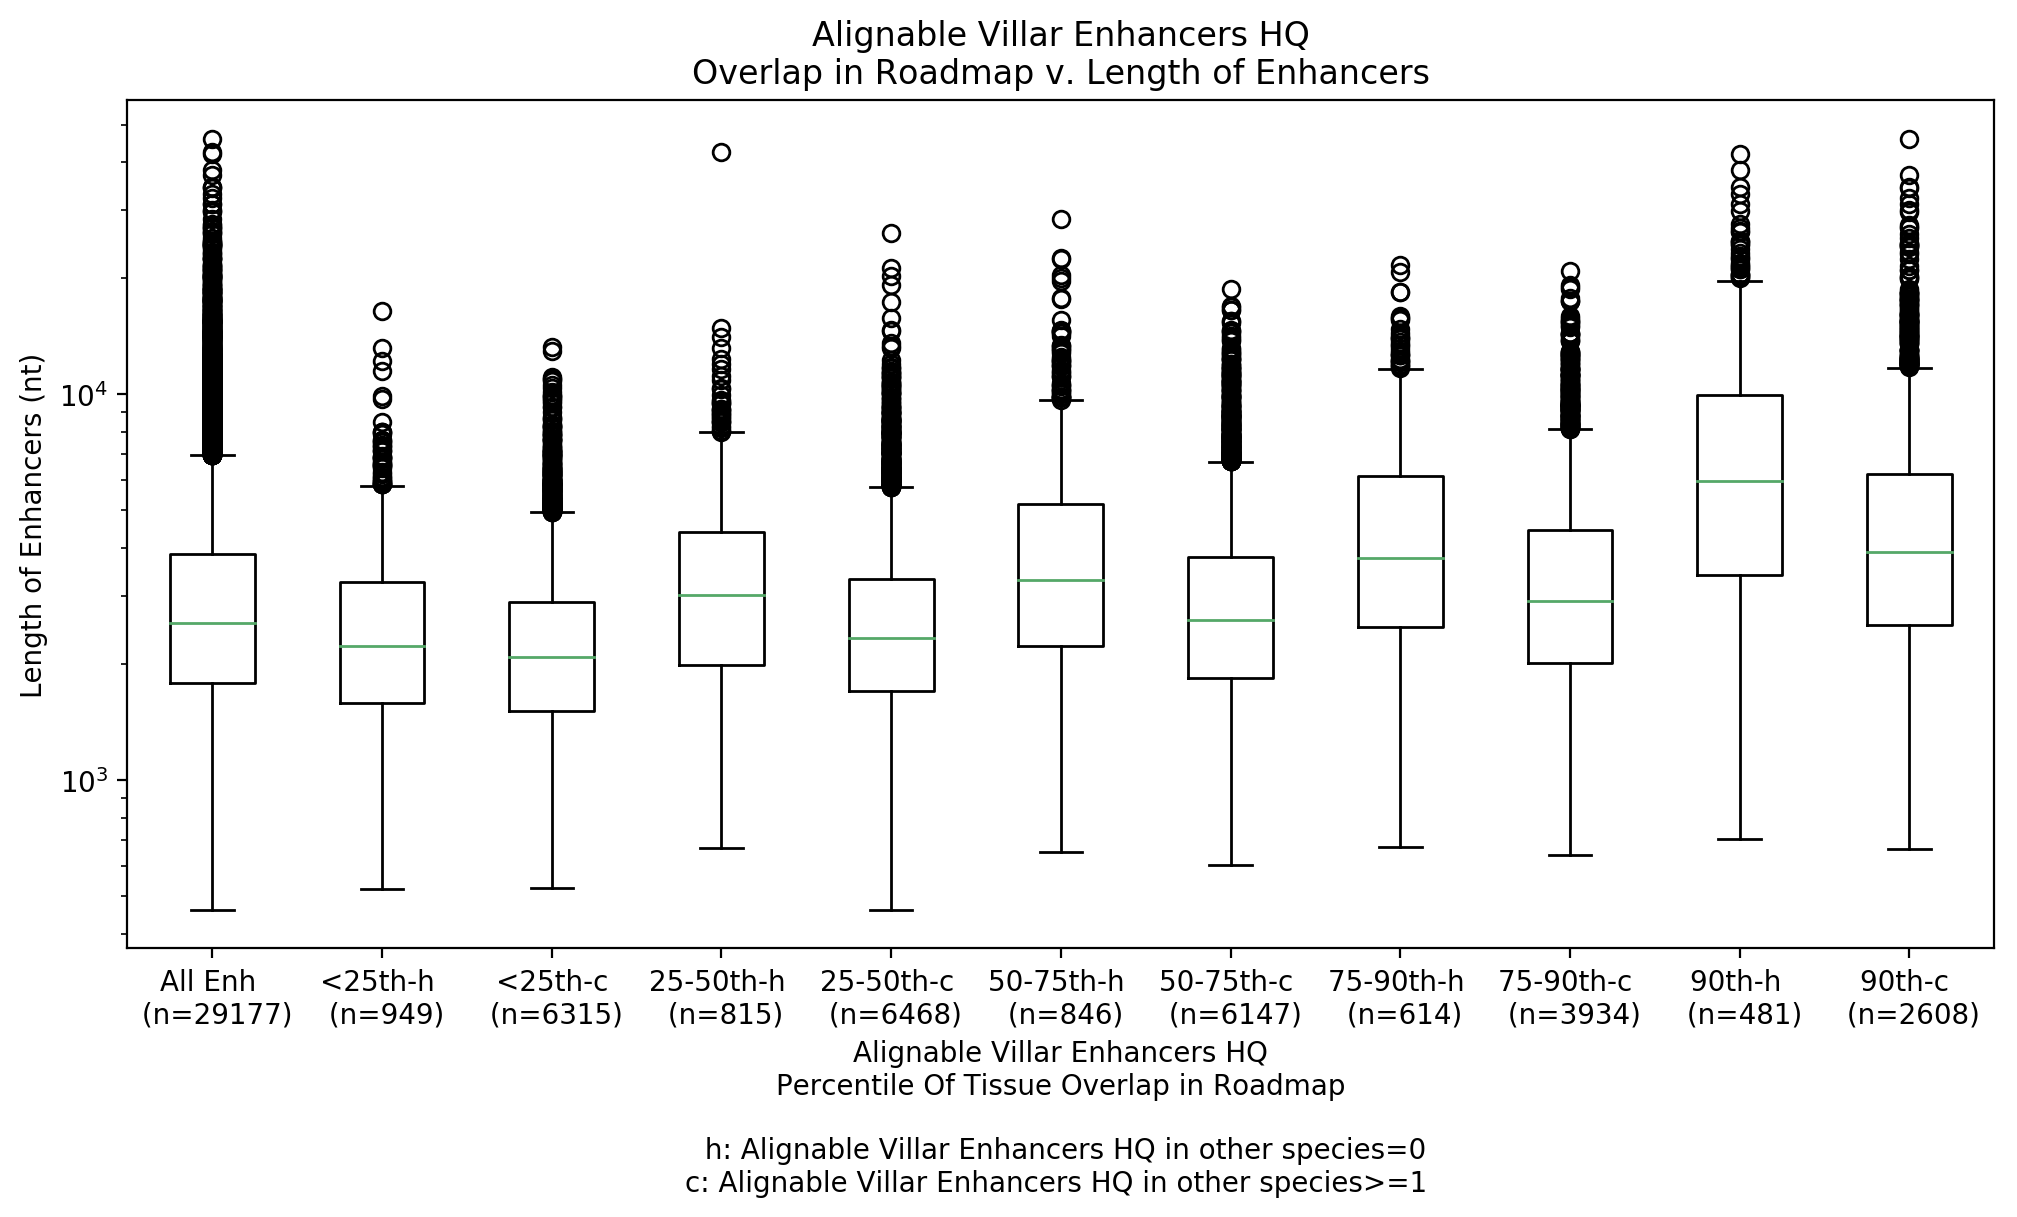

hq_aln_sp -52.5410055463 0.0


In [6]:
 # 'a' = 'all'
 # 'h' = 'human' specific enhancers
 # 'c' = 'conserved' enhancers
 # 'd' = 'dataset'

 #'act' = active
 #'aln' = alignable

dtype = ['act_sp', 'aln_sp', 'hq_act_sp', 'hq_aln_sp']
dtype = ['hq_act_sp', 'hq_aln_sp']
for item in dtype:
    vrs_0 = vrs.loc[vrs["sum"]<q25] # sum = the number of overlapping roadmap tissues
    vrs_0a = vrs_0["length"]
    vrs_0h = vrs_0["length"].loc[vrs_0[item]==0]
    vrs_0c = vrs_0["length"].loc[vrs_0[item] >0]
    vrs_0d = [vrs_0a, vrs_0c, vrs_0h]
    
    vrs_25 = vrs.loc[vrs["sum"]>=q25]
    vrs_25 = vrs_25.loc[vrs_25["sum"]<q50]
    vrs_25a = vrs_25["length"]
    vrs_25h =vrs_25["length"].loc[vrs_25[item]==0]
    vrs_25c = vrs_25["length"].loc[vrs_25[item] >0]
    vrs_25d = [vrs_25a, vrs_25c, vrs_25h]

    vrs_50 = vrs.loc[vrs["sum"]>=q50]
    vrs_50 = vrs_50.loc[vrs_50["sum"]<q75]
    vrs_50a = vrs_50["length"]
    vrs_50h =vrs_50["length"].loc[vrs_50[item]==0]
    vrs_50c = vrs_50["length"].loc[vrs_50[item] >0]
    vrs_50d = [vrs_50a, vrs_50c, vrs_50h]

    vrs_75 = vrs.loc[vrs["sum"]>=q75]
    vrs_75 = vrs_75.loc[vrs_75["sum"]<q90]
    vrs_75a = vrs_75["length"]
    vrs_75h =vrs_75["length"].loc[vrs_75[item]==0]
    vrs_75c = vrs_75["length"].loc[vrs_75[item] >0]
    vrs_75d = [vrs_75a, vrs_75c, vrs_75h]
    
    vrs_90 = vrs.loc[vrs["sum"]>=q90]
    vrs_90a = vrs_90["length"]
    vrs_90h =vrs_90["length"].loc[vrs_90[item]==0]
    vrs_90c = vrs_90["length"].loc[vrs_90[item] >0]
    vrs_90d = [vrs_90a, vrs_90c, vrs_90h]

    all_enh = vrs["length"]

    data_d = [all_enh, vrs_90d, vrs_75d, vrs_50d, vrs_25d, vrs_0d] # all, hu, conserved
    
    data_a = [all_enh, vrs_0a, vrs_25a, vrs_50a, vrs_75a, vrs_90a]
    data_h = [all_enh, vrs_0h, vrs_25h, vrs_50h, vrs_75h, vrs_90h]
    data_c = [all_enh, vrs_0c, vrs_25c, vrs_50c, vrs_75c, vrs_90c]
    
    data_2 = [all_enh, vrs_0h, vrs_0c, vrs_25h, vrs_25c, vrs_50h, vrs_50c, vrs_75h,vrs_75c, vrs_90h, vrs_90c]

    binn = 50

    ###### LABELS #######

    labels = ["All Enh \n (n=%s)" % len(all_enh), "<25th\n (n=%s)" % len(vrs_0a), "25-50th \n (n=%s)" % len(vrs_25a), "50-75th \n (n=%s)" % len(vrs_50a), "75-90th \n (n=%s)" % len(vrs_75a), "90th \n (n=%s)" % len(vrs_90a)]

    labels_c = ["All Enh \n (n=%s)" % len(all_enh), "<25th\n (n=%s)" % len(vrs_0c), "25-50th \n (n=%s)" % len(vrs_25c), "50-75th \n (n=%s)" % len(vrs_50c), "75-90th \n (n=%s)" % len(vrs_75c), "90th \n (n=%s)" % len(vrs_90c)]

    labels_h = ["All Enh \n (n=%s)" % len(all_enh), "<25th\n (n=%s)" % len(vrs_0h), "25-50th \n (n=%s)" % len(vrs_25h), "50-75th \n (n=%s)" % len(vrs_50h), "75-90th \n (n=%s)" % len(vrs_75h), "90th \n (n=%s)" % len(vrs_90h)]
    
    labels_2 = ["All Enh \n (n=%s)" % len(all_enh), "<25th-h \n (n=%s)" % len(vrs_0h),"<25th-c\n (n=%s)" % len(vrs_0c),"25-50th-h \n (n=%s)" % len(vrs_25h),  "25-50th-c \n (n=%s)" % len(vrs_25c), "50-75th-h \n (n=%s)" % len(vrs_50h), "50-75th-c \n (n=%s)" % len(vrs_50c), "75-90th-h \n (n=%s)" % len(vrs_75h),"75-90th-c \n (n=%s)" % len(vrs_75c), "90th-h \n (n=%s)" % len(vrs_90h),"90th-c \n (n=%s)" % len(vrs_90c),]
    
    if item == 'act_sp':
        x = "Active Villar Enhancers"
    elif item == 'aln_sp':
        x =  "Alignable Villar Enhancers"
    elif item == 'hq_act_sp':
        x =  "Active Villar Enhancers HQ"
    elif item == 'hq_aln_sp':
        x =  "Alignable Villar Enhancers HQ"


    ####### BOXPLOT #######
    plt.figure(num=None, figsize=(10,6), dpi=200, facecolor='w', edgecolor='k')
    plt.boxplot(data_2, labels = labels_2)
    #plt.boxplot(data_a, labels = labels)
    #plt.boxplot(data_h, labels = labels_h
    #plt.boxplot(data_c, labels = labels_c)
    
    plt.yscale("log")
    
    plt.ylabel("Length of Enhancers (nt)")
    
    plt.xlabel("%s\nPercentile Of Tissue Overlap in Roadmap\n\n h: %s in other species=0\nc: %s in other species>=1 " % (x,x,x))
    plt.title("%s\nOverlap in Roadmap v. Length of Enhancers" % x)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    #plt.savefig("/Users/sarahfong/Desktop/CAPRA/%s/%s_%s_BAE_length_con_only" % (today, today, item))
    plt.show()
    plt.close()
    a,p = stats.ttest_ind(data_a[1], data_a[5])
    print(item, a, p)
    #af, ap= stats.f_oneway(data_a[1], data_a[2], data_a[3], data_a[4], data_a[5])
    #cf, cp= stats.f_oneway(data_c[1], data_c[2], data_c[3], data_c[4], data_c[5])
    #hf, hp=stats.f_oneway(data_h[1], data_h[2], data_h[3], data_h[4], data_h[5])
    #print(item, "all, cons, hu", ap, cp, hp)


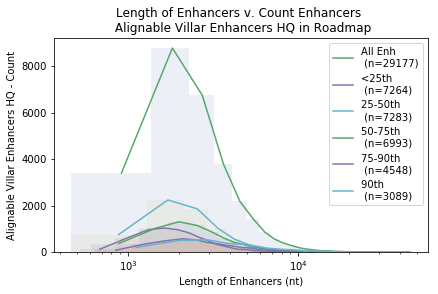

In [6]:
   ########### LINE+ HISTOGRAM #########
val = 0    
for a in data_a:    
    ind = val
    data, bins, patches = plt.hist(a, binn, alpha = 0.1, normed = False)
        
    bincenters = 0.5*(bins[1:]+ bins[:-1])
    plt.plot(bincenters,data,'-', label = labels[val])
    
    val = val + 1
plt.xscale("log")

plt.xlabel("Length of Enhancers (nt)")
    
plt.ylabel("%s - Count" % x)
plt.legend()
plt.title("Length of Enhancers v. Count Enhancers \n %s in Roadmap" % x)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
#plt.savefig("%sline_histo%s" % (result_path,item))
plt.show()
plt.close()

